# Мещерякова Ксения, 932003

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dropout

### Датасет содержит данные о погоде в Калининграде

In [2]:
#открываем файл с данными и выводим на экран
df = pd.read_csv("Kaliningrad_weather_19102020_15102011.csv", encoding='cp1251', sep=";", index_col = 0)
df

,T,Po,P,Pa,U,DD
LocalTime,,,,,,
19.10.2020 11:00,8.0,761.2,762.5,NaN,83.0,Ветер
19.10.2020 08:00,5.3,760.0,761.3,NaN,90.0,Ветер
19.10.2020 05:00,3.1,759.2,760.6,NaN,94.0,Ветер
19.10.2020 02:00,2.9,758.2,759.6,NaN,90.0,Ветер
18.10.2020 23:00,3.0,757.2,758.5,NaN,91.0,Ветер
...,...,...,...,...,...,...
15.10.2011 14:00,9.0,773.2,775.2,NaN,64.0,Штиль
15.10.2011 11:00,7.6,773.3,775.3,NaN,68.0,Ветер
15.10.2011 08:00,4.7,772.9,774.9,NaN,93.0,Ветер


Значение столбцов:
* LocalTime - Дата и время наблюдений
* T - Температура в момент наблюдений
* Po - Атмосферное давление на уровне станции в момент наблюдений
* P - Атмосферное давление на уровне моря в момент наблюдений
* Pa - Атмосферное давление, приведенное к среднему уровню моря в момент наблюдений
* U - Относительная влажность воздуха в момент наблюдений
* DD - Наличие ветра в момент наблюдений

Признаки, используемые для анализа: "LocalTime" и "T"

In [3]:
#Выводим первые 5 записей
df.head()

,T,Po,P,Pa,U,DD
LocalTime,,,,,,
19.10.2020 11:00,8.0,761.2,762.5,NaN,83.0,Ветер
19.10.2020 08:00,5.3,760.0,761.3,NaN,90.0,Ветер
19.10.2020 05:00,3.1,759.2,760.6,NaN,94.0,Ветер
19.10.2020 02:00,2.9,758.2,759.6,NaN,90.0,Ветер
18.10.2020 23:00,3.0,757.2,758.5,NaN,91.0,Ветер


In [4]:
#Выводим последние 5 записей
df.tail()

,T,Po,P,Pa,U,DD
LocalTime,,,,,,
15.10.2011 14:00,9.0,773.2,775.2,NaN,64.0,Штиль
15.10.2011 11:00,7.6,773.3,775.3,NaN,68.0,Ветер
15.10.2011 08:00,4.7,772.9,774.9,NaN,93.0,Ветер
15.10.2011 05:00,4.9,772.4,774.4,NaN,94.0,Штиль
15.10.2011 02:00,5.3,772.6,774.6,NaN,94.0,Штиль


In [5]:
df=df.reset_index() 
df

,LocalTime,T,Po,P,Pa,U,DD
0,19.10.2020 11:00,8.0,761.2,762.5,NaN,83.0,Ветер
1,19.10.2020 08:00,5.3,760.0,761.3,NaN,90.0,Ветер
2,19.10.2020 05:00,3.1,759.2,760.6,NaN,94.0,Ветер
3,19.10.2020 02:00,2.9,758.2,759.6,NaN,90.0,Ветер
4,18.10.2020 23:00,3.0,757.2,758.5,NaN,91.0,Ветер
...,...,...,...,...,...,...,...
26264,15.10.2011 14:00,9.0,773.2,775.2,NaN,64.0,Штиль
26265,15.10.2011 11:00,7.6,773.3,775.3,NaN,68.0,Ветер
26266,15.10.2011 08:00,4.7,772.9,774.9,NaN,93.0,Ветер
26267,15.10.2011 05:00,4.9,772.4,774.4,NaN,94.0,Штиль


In [6]:
#Описание данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26269 entries, 0 to 26268
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LocalTime  26269 non-null  object 
 1   T          26253 non-null  float64
 2   Po         26237 non-null  float64
 3   P          26221 non-null  float64
 4   Pa         21831 non-null  float64
 5   U          26233 non-null  float64
 6   DD         25864 non-null  object 
dtypes: float64(5), object(2)
memory usage: 1.4+ MB


Метод data.info() выводит информацию о данных: названия столбцов, количество ненулевых значений, тип данных и использование памяти. В данном датасете все столбцы числового типа данных(float), за исключением двух: "LocalTime" и "DD" - они содержат данные типа object

In [7]:
#Фильтруем и оставляем только два нужных столбца
df=df[['LocalTime','T']]

In [8]:
#Вычисляем количество пропущенных значений
df.isna().sum()

LocalTime     0
T            16
dtype: int64

In [9]:
#Удаляем пропущенные значения
df = df.dropna()

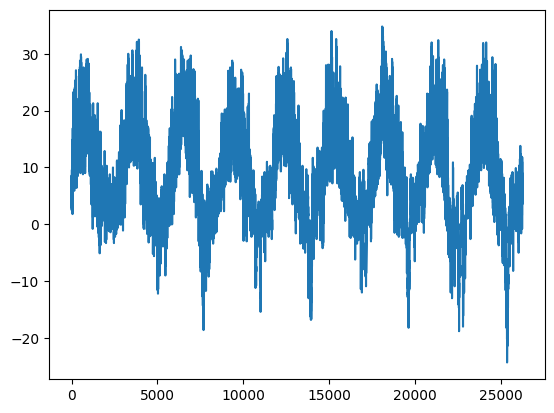

In [10]:
#Строим график значений температуры
plt.plot(range(1,len(df['T'].values)+1),df['T'].values)

In [11]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

data = df['T'].values
data = min_max_scaler.fit_transform(data.reshape(-1, 1))

In [12]:
#Преобразование массива
print(data.shape)
data =data.flatten()
print(data.shape)

(26253, 1)
(26253,)


In [13]:
#Раздеряем данные
window = 15

n_samples=data.shape[0]-window
n_train_samples=round(0.7*n_samples)
n_val_samples=round(0.15*n_samples)
n_test_samples=n_samples-n_train_samples-n_val_samples
print('Train = ',n_train_samples,'Validation = ',n_val_samples,'Test = ',n_test_samples)

Train =  18367 Validation =  3936 Test =  3935


In [14]:
#Создаём массивы для обучающей, валидационной и тестовой выборки
X_train=np.zeros((n_train_samples,window))
y_train=np.zeros(n_train_samples)

X_val=np.zeros((n_val_samples,window))
y_val=np.zeros(n_val_samples)

X_test=np.zeros((n_test_samples,window))
y_test=np.zeros(n_test_samples)

In [15]:
#Заполняем массивы
for i in range(n_train_samples):
  for j in range(window):
    X_train[i,j]=data[i+j]
  y_train[i]=data[i+window]

for i in range(n_val_samples):
  for j in range(window):
    X_val[i,j]=data[n_train_samples+i+j]
  y_val[i]=data[n_train_samples+i+window]

for i in range(n_test_samples):
  for j in range(window):
    X_test[i,j]=data[n_train_samples+n_val_samples+i+j]
  y_test[i]=data[n_train_samples+n_val_samples+i+window]

In [16]:
#Модель ff_model представляет собой нейронную сеть с одним скрытым слоем и одним выходным слоем
from keras.models import Sequential
from keras.layers import Dense

ff_model=Sequential()
ff_model.add(Dense(10,activation='relu',input_dim=window))
ff_model.add(Dropout(0.2))   # добавляем прореживание Dropout
ff_model.add(Dense(1))

In [17]:
#Выводим обзорную таблицу
ff_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                160       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 171 (684.00 Byte)
Trainable params: 171 (684.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
#Готовим модель к обучению
ff_model.compile(loss='mse',optimizer='adam',metrics='mae')

In [19]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

early_stop = EarlyStopping(monitor='val_mae',patience=5,mode='min',verbose=1)
checkpoint = ModelCheckpoint('best_model_weights.h5', monitor='val_mae', verbose=1, save_best_only=True, mode='min')
callbacks_list=[early_stop,checkpoint]

In [20]:
#Обучаем модель
ff_model_history = ff_model.fit(X_train,y_train,batch_size=25,epochs=15,
                                callbacks=callbacks_list,
                                validation_data=(X_val,y_val))

Epoch 1/15
727/735 [============================>.] - ETA: 0s - loss: 0.2072 - mae: 0.2816
Epoch 1: val_mae improved from inf to 0.06952, saving model to best_model_weights.h5
735/735 [==============================] - 7s 7ms/step - loss: 0.2054 - mae: 0.2801 - val_loss: 0.0083 - val_mae: 0.0695
Epoch 2/15
  1/735 [..............................] - ETA: 5s - loss: 0.0232 - mae: 0.1167

c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


729/735 [============================>.] - ETA: 0s - loss: 0.0256 - mae: 0.1236
Epoch 2: val_mae did not improve from 0.06952
735/735 [==============================] - 4s 6ms/step - loss: 0.0256 - mae: 0.1236 - val_loss: 0.0081 - val_mae: 0.0697
Epoch 3/15
734/735 [============================>.] - ETA: 0s - loss: 0.0178 - mae: 0.1035
Epoch 3: val_mae improved from 0.06952 to 0.06226, saving model to best_model_weights.h5
735/735 [==============================] - 5s 6ms/step - loss: 0.0178 - mae: 0.1035 - val_loss: 0.0067 - val_mae: 0.0623
Epoch 4/15
730/735 [============================>.] - ETA: 0s - loss: 0.0115 - mae: 0.0817
Epoch 4: val_mae improved from 0.06226 to 0.04940, saving model to best_model_weights.h5
735/735 [==============================] - 5s 6ms/step - loss: 0.0115 - mae: 0.0816 - val_loss: 0.0044 - val_mae: 0.0494
Epoch 5/15
733/735 [============================>.] - ETA: 0s - loss: 0.0074 - mae: 0.0645
Epoch 5: val_mae improved from 0.04940 to 0.04189, saving mo

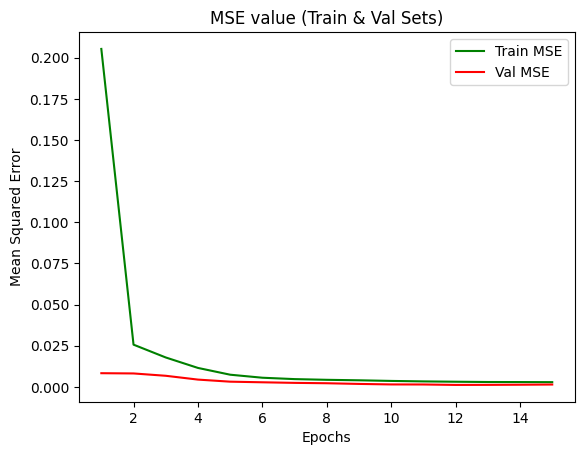

In [21]:
loss_function = ff_model_history.history['loss']
val_loss_function = ff_model_history.history['val_loss']

epochs=range(1,len(loss_function)+1)

plt.title('MSE value (Train & Val Sets)')
plt.plot(epochs,loss_function,color='green',label='Train MSE')
plt.plot(epochs,val_loss_function,color='red',label='Val MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

Вывод: график MSE быстро убывает, значит, модель улучшает свою способность предсказывать результаты на основе данных, с которыми она обучается

In [22]:
ff_model.load_weights('best_model_weights.h5')

In [23]:
from sklearn.metrics import mean_absolute_error,r2_score

y_pred = ff_model.predict(X_test)
y_pred_inv = min_max_scaler.inverse_transform(y_pred)
y_test_inv = min_max_scaler.inverse_transform(y_test.reshape(-1,1))

print('MAE = ',round(mean_absolute_error(y_true=y_test_inv,y_pred=y_pred_inv),3),' K degrees')
print('R2-score = ',round(r2_score(y_test_inv,y_pred_inv),3))

123/123 [==============================] - 1s 4ms/step
MAE =  1.436  K degrees
R2-score =  0.953


Вывод: 
* R2 = 0.953: Это очень высокое значение, которое показывает, что модель очень хорошо соответствует наблюдаемым данным.
* MAE = 1.436: Это означает, что в среднем прогнозы отклоняются от истинных значений всего на 1.436 градуса по Кельвину. Это довольно маленькое отклонение, особенно если учесть диапазон возможных значений температуры

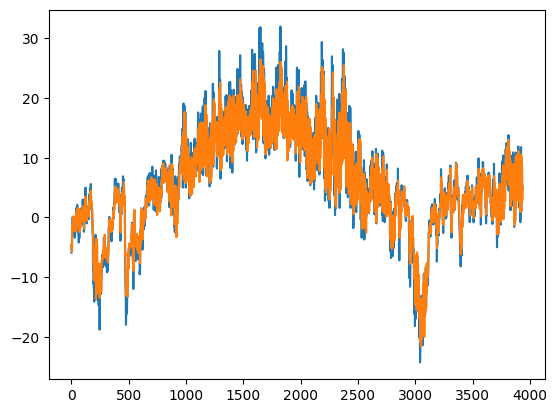

In [24]:
#Построение графиков
plt.plot(range(1,len(y_test_inv)+1),y_test_inv)
plt.plot(range(1,len(y_pred_inv)+1),y_pred_inv)

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
# FF-модель
y_pred_ff = ff_model.predict(X_test)
mse_ff = mean_squared_error(y_test, y_pred_ff)
print(f'MSE для FF-модели: {mse_ff}')

123/123 [==============================] - 1s 4ms/step
MSE для FF-модели: 0.0010652422045027434


Вывод: MSE (Средняя квадратичная ошибка) около 0.00107. Это число говорит о том, как далеки прогнозы от истинных значений. Значение MSE близкое к нулю обычно свидетельствует о хорошей модели

In [27]:
#Определяем простую рекуррентную модель (RNN)
from keras.layers import SimpleRNN

simple_rnn_model = Sequential()
simple_rnn_model.add(SimpleRNN(10,activation='relu',input_shape=(window,1)))
simple_rnn_model.add(Dropout(0.2))  # добавляем прореживание Dropout
simple_rnn_model.add(Dense(1,activation='linear'))

In [28]:
#Разделяем выборки на обучающую, тестовую и валидационную
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_val = np.reshape(X_val,(X_val.shape[0],X_val.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [29]:
simple_rnn_model.compile(loss='mse',optimizer='adam',metrics='mae')

In [30]:
early_stop = EarlyStopping(monitor='val_mae',patience=5,mode='min',verbose=1)
checkpoint = ModelCheckpoint('best_model.h5',
                              monitor='val_mae',verbose=1,mode='min',
                              save_best_only=True)
callbacks_list=[early_stop,checkpoint]

In [31]:
#Обучаем модель
simple_rnn_model_history = simple_rnn_model.fit(X_train,y_train,batch_size=25,epochs=15,
                                callbacks=callbacks_list,
                                validation_data=(X_val,y_val))

Epoch 1/15
731/735 [============================>.] - ETA: 0s - loss: 0.0811 - mae: 0.1959
Epoch 1: val_mae improved from inf to 0.08499, saving model to best_model.h5
735/735 [==============================] - 13s 13ms/step - loss: 0.0808 - mae: 0.1955 - val_loss: 0.0115 - val_mae: 0.0850
Epoch 2/15
  6/735 [..............................] - ETA: 7s - loss: 0.0343 - mae: 0.1285

c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


734/735 [============================>.] - ETA: 0s - loss: 0.0224 - mae: 0.1117
Epoch 2: val_mae did not improve from 0.08499
735/735 [==============================] - 9s 12ms/step - loss: 0.0224 - mae: 0.1117 - val_loss: 0.0116 - val_mae: 0.0866
Epoch 3/15
732/735 [============================>.] - ETA: 0s - loss: 0.0135 - mae: 0.0885
Epoch 3: val_mae improved from 0.08499 to 0.05081, saving model to best_model.h5
735/735 [==============================] - 9s 12ms/step - loss: 0.0135 - mae: 0.0884 - val_loss: 0.0046 - val_mae: 0.0508
Epoch 4/15
735/735 [==============================] - ETA: 0s - loss: 0.0062 - mae: 0.0581
Epoch 4: val_mae improved from 0.05081 to 0.04579, saving model to best_model.h5
735/735 [==============================] - 9s 12ms/step - loss: 0.0062 - mae: 0.0581 - val_loss: 0.0036 - val_mae: 0.0458
Epoch 5/15
733/735 [============================>.] - ETA: 0s - loss: 0.0051 - mae: 0.0541
Epoch 5: val_mae improved from 0.04579 to 0.04481, saving model to best_m

In [32]:
simple_rnn_model.load_weights('best_model.h5')

In [33]:
#Оцениваем прогнозирование
y_pred = simple_rnn_model.predict(X_test)
y_pred_inv = min_max_scaler.inverse_transform(y_pred)
y_test_inv = min_max_scaler.inverse_transform(y_test.reshape(-1,1))

print('MAE = ',round(mean_absolute_error(y_true=y_test_inv,y_pred=y_pred_inv),3),' K degrees')
print('R2-score = ',round(r2_score(y_test_inv,y_pred_inv),3))

123/123 [==============================] - 1s 6ms/step
MAE =  1.471  K degrees
R2-score =  0.945


Выводы: 
* MAE = 1.471: Это означает, что в среднем прогнозы отклоняются от истинных значений всего на 1.471 градуса по Кельвину. Это довольно маленькое отклонение, особенно если учесть диапазон возможных значений температуры
* R2 = 0.945: Это очень высокое значение, которое показывает, что модель очень хорошо соответствует наблюдаемым данным.

In [34]:
# SimpleRNN-модель
y_pred_rnn = simple_rnn_model.predict(X_test)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
print(f'MSE для SimpleRNN-модели: {mse_rnn}')

123/123 [==============================] - 1s 6ms/step
MSE для SimpleRNN-модели: 0.0012361247892373217


Вывод: MSE (Средняя квадратичная ошибка) около 0.00124. Это число говорит о том, как далеки прогнозы от истинных значений ( на сколько они "неправильны"). Значение MSE близкое к нулю обычно свидетельствует о хорошей модели

In [35]:
# Определяем lSTM в скрытом слое
from keras.models import Sequential
from keras.layers import Dense,LSTM

model = Sequential()
model.add(LSTM(10,input_shape=(window,1)))
model.add(Dropout(0.2))  # добавляем прореживание Dropout
model.add(Dense(1,activation='linear'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 491 (1.92 KB)
Trainable params: 491 (1.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
model.compile(optimizer='adam',loss='mse',metrics='mae')

In [37]:
#Обучаем модель
history = model.fit(X_train,y_train,epochs=30,batch_size=32,
                    validation_data=(X_val,y_val))

Epoch 1/30
574/574 [==============================] - 20s 22ms/step - loss: 0.0320 - mae: 0.1201 - val_loss: 0.0041 - val_mae: 0.0497
Epoch 2/30
574/574 [==============================] - 11s 19ms/step - loss: 0.0094 - mae: 0.0747 - val_loss: 0.0038 - val_mae: 0.0474
Epoch 3/30
574/574 [==============================] - 11s 19ms/step - loss: 0.0078 - mae: 0.0675 - val_loss: 0.0039 - val_mae: 0.0482
Epoch 4/30
574/574 [==============================] - 11s 19ms/step - loss: 0.0063 - mae: 0.0605 - val_loss: 0.0037 - val_mae: 0.0471
Epoch 5/30
574/574 [==============================] - 11s 19ms/step - loss: 0.0053 - mae: 0.0553 - val_loss: 0.0036 - val_mae: 0.0467
Epoch 6/30
574/574 [==============================] - 11s 19ms/step - loss: 0.0045 - mae: 0.0507 - val_loss: 0.0035 - val_mae: 0.0455
Epoch 7/30
574/574 [==============================] - 11s 19ms/step - loss: 0.0040 - mae: 0.0478 - val_loss: 0.0033 - val_mae: 0.0442
Epoch 8/30
574/574 [==============================] - 11s 19ms

In [38]:
y_pred = model.predict(X_test)
y_pred_inv = min_max_scaler.inverse_transform(y_pred)
y_test_inv = min_max_scaler.inverse_transform(y_test.reshape(-1,1))

123/123 [==============================] - 2s 8ms/step


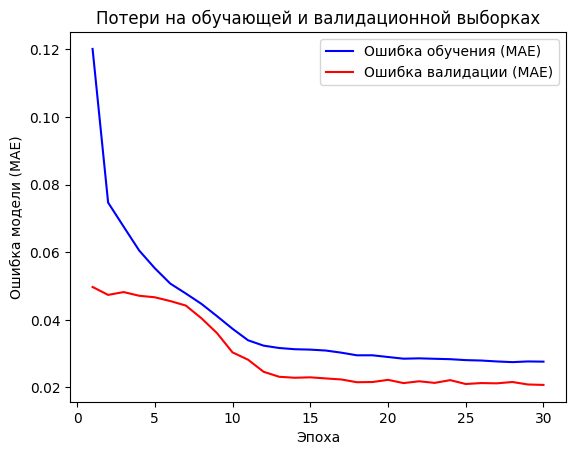

In [39]:
# Вычисляем метрику MAE
mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1,len(mae)+1)

plt.title('Потери на обучающей и валидационной выборках')
plt.plot(epochs,mae,color='blue',label='Ошибка обучения (MAE)')
plt.plot(epochs,val_mae,color='red',label='Ошибка валидации (MAE)')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка модели (MAE)')
plt.legend()
plt.show()

Вывод: Кривые сначала снижались, а затем шли стабильно. Это говорит о том, что модель достаточно обучилась. Если бы кривые продолжали убывать, это говорило бы о недообучении, а при возрастании - о переобучении

In [40]:
#Оцениваем прогнозирование
y_pred = model.predict(X_test)
y_pred_inv = min_max_scaler.inverse_transform(y_pred)
y_test_inv = min_max_scaler.inverse_transform(y_test.reshape(-1,1))

from sklearn.metrics import r2_score,mean_absolute_error

print('R2 Score (Test) = ',round(r2_score(y_true=y_test_inv,y_pred=y_pred_inv),3))
print('MAE (Test) = ',round(mean_absolute_error(y_true=y_test_inv,
                                                     y_pred=y_pred_inv),3))

123/123 [==============================] - 1s 7ms/step
R2 Score (Test) =  0.967
MAE (Test) =  1.165


Вывод: 
* R2 = 0.967: Это очень высокое значение, которое показывает, что модель очень хорошо соответствует наблюдаемым данным.
* MAE = 1.165: Это означает, что в среднем прогнозы отклоняются от истинных значений всего на 1.165 градуса по Кельвину. Это довольно маленькое отклонение, особенно если учесть диапазон возможных значений температуры

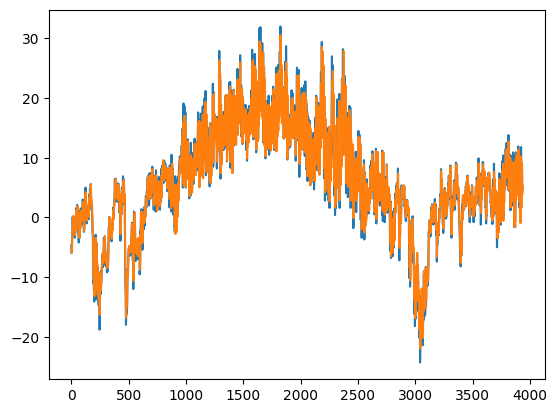

In [41]:
#Построение графиков
plt.plot(range(1,len(y_test_inv)+1),y_test_inv)
plt.plot(range(1,len(y_pred_inv)+1),y_pred_inv)

In [48]:
# LSTM-модель
y_pred_lstm = model.predict(X_test)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
print(f'MSE для LSTM-модели: {mse_lstm}')

123/123 [==============================] - 1s 7ms/step
MSE для LSTM-модели: 0.0007376451936121378


Вывод: MSE (Средняя квадратичная ошибка) около 0.00074. Это число говорит о том, как далеки прогнозы от истинных значений. Значение MSE близкое к нулю обычно свидетельствует о хорошей модели

In [42]:
#Определяем стек из двух слоев LSTM
from keras.models import Sequential
from keras.layers import Dense,LSTM

stacked_lstm_model = Sequential()
stacked_lstm_model.add(LSTM(10, input_shape=(window,1), return_sequences=True)) # Первый слой LSTM
stacked_lstm_model.add(Dropout(0.2))  # Dropout после первого слоя LSTM
stacked_lstm_model.add(LSTM(10)) # Второй слой LSTM
stacked_lstm_model.add(Dropout(0.2))  # Dropout после второго слоя LSTM
stacked_lstm_model.add(Dense(1,activation='linear'))

stacked_lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 15, 10)            480       
                                                                 
 dropout_3 (Dropout)         (None, 15, 10)            0         
                                                                 
 lstm_2 (LSTM)               (None, 10)                840       
                                                                 
 dropout_4 (Dropout)         (None, 10)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1331 (5.20 KB)
Trainable params: 1331 (5.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
#Обучаем модель
stacked_lstm_model.compile(optimizer='adam',loss='mse',metrics='mae')

history = stacked_lstm_model.fit(X_train,y_train,epochs=30,batch_size=32,
                                 validation_data=(X_val,y_val))

Epoch 1/30
574/574 [==============================] - 35s 37ms/step - loss: 0.0243 - mae: 0.1123 - val_loss: 0.0042 - val_mae: 0.0498
Epoch 2/30
574/574 [==============================] - 19s 33ms/step - loss: 0.0099 - mae: 0.0771 - val_loss: 0.0039 - val_mae: 0.0483
Epoch 3/30
574/574 [==============================] - 19s 33ms/step - loss: 0.0073 - mae: 0.0653 - val_loss: 0.0039 - val_mae: 0.0478
Epoch 4/30
574/574 [==============================] - 19s 33ms/step - loss: 0.0058 - mae: 0.0580 - val_loss: 0.0038 - val_mae: 0.0477
Epoch 5/30
574/574 [==============================] - 19s 33ms/step - loss: 0.0049 - mae: 0.0533 - val_loss: 0.0038 - val_mae: 0.0475
Epoch 6/30
574/574 [==============================] - 19s 33ms/step - loss: 0.0044 - mae: 0.0507 - val_loss: 0.0038 - val_mae: 0.0481
Epoch 7/30
574/574 [==============================] - 19s 33ms/step - loss: 0.0042 - mae: 0.0497 - val_loss: 0.0036 - val_mae: 0.0462
Epoch 8/30
574/574 [==============================] - 19s 33ms

In [44]:
# Вычисление прогноза и обратное преобразование для получения температуры
y_pred = stacked_lstm_model.predict(X_test)
y_pred_inv = min_max_scaler.inverse_transform(y_pred)
y_test_inv = min_max_scaler.inverse_transform(y_test.reshape(-1,1))

123/123 [==============================] - 4s 11ms/step


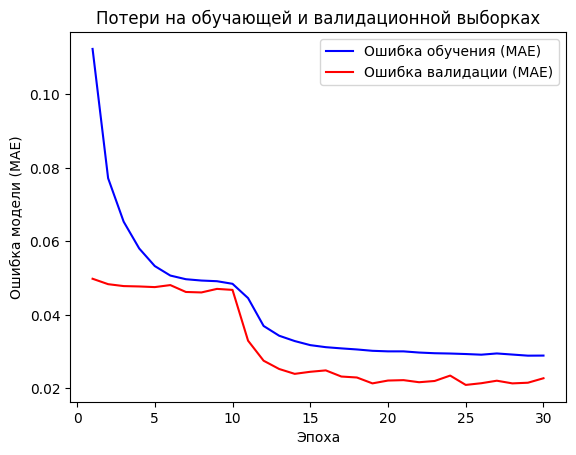

In [45]:
# Вывод значений ошибок 
mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1,len(mae)+1)

plt.title('Потери на обучающей и валидационной выборках')
plt.plot(epochs,mae,color='blue',label='Ошибка обучения (MAE)')
plt.plot(epochs,val_mae,color='red',label='Ошибка валидации (MAE)')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка модели (MAE)')
plt.legend()
plt.show()

Вывод: Кривые сначала снижались, а затем шли стабильно. Это говорит о том, что модель достаточно обучилась. Если бы кривые продолжали убывать, это говорило бы о недообучении, а при возрастании - о переобучении

In [50]:
# Выведем на экран коэффициент детерминации и среднюю абсолютную ошибку
print('R2 Score (Test) = ',round(r2_score(y_true=y_test_inv,y_pred=y_pred_inv),3))
print('MAE (Test) = ',round(mean_absolute_error(y_true=y_test_inv,y_pred=y_pred_inv),3))

R2 Score (Test) =  0.962
MAE (Test) =  1.274


Вывод: 
* R2 = 0.962: Это очень высокое значение, которое показывает, что модель очень хорошо соответствует наблюдаемым данным.
* MAE = 1.274: Это означает, что в среднем прогнозы отклоняются от истинных значений всего на 1.274 градуса по Кельвину. Это довольно маленькое отклонение, особенно если учесть диапазон возможных значений температуры

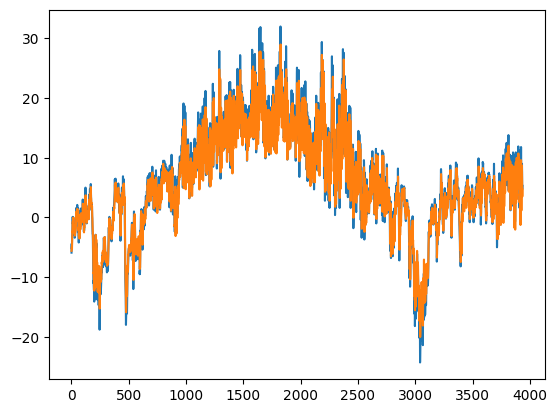

In [47]:
# График сравнения прогнозируемых и реальных значений температуры
plt.plot(range(1,len(y_test_inv)+1),y_test_inv)
plt.plot(range(1,len(y_pred_inv)+1),y_pred_inv)

In [49]:
# Вычисляем MSE
y_pred = stacked_lstm_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print('MSE:', mse)

123/123 [==============================] - 1s 10ms/step
MSE: 0.0008571855478003175


Вывод: MSE (Средняя квадратичная ошибка) около 0.00086. Это число говорит о том, как далеки прогнозы от истинных значений. Значение MSE близкое к нулю обычно свидетельствует о хорошей модели

### Вывод: 
Результаты показывают, что "Регрессор – стек двух слоёв с LSTM " обладает наилучшей предсказательной способностью, в то время как "Регрессор, использующий слой RNN в качестве скрытого слоя" и "Регрессор, ячейку LSTM в скрытом слое" также демонстрируют хорошие результаты, но с некоторыми отличиями.
